In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall

In [4]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

heartPCA = pd.read_csv('PCAData.csv')
heartPCA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartPCA['num'] = heart.num

heartICA = pd.read_csv('ICAData.csv')
heartICA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartICA['num'] = heart.num

heartFactor = pd.read_csv('FactorData.csv')
heartFactor.drop(['Unnamed: 0'],axis=1, inplace=True)
heartFactor['num'] = heart.num

In [5]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()
XPCA = heartPCA.drop(['num'],axis=1).copy()
YPCA = heartPCA.num.copy()
XICA = heartICA.drop(['num'],axis=1).copy()
YICA = heartICA.num.copy()
XFactor = heartFactor.drop(['num'],axis=1).copy()
YFactor = heartFactor.num.copy()

In [6]:
SC = StandardScaler()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                   test_size = 0.33, stratify = Y)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(SC.fit_transform(X), Y,
                                   test_size = 0.33, stratify = Y)
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(XPCA, YPCA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA = train_test_split(XICA, YICA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(XFactor, YFactor, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)

In [8]:
rfc = RandomForestClassifier()
rfc.set_params( n_estimators = 500)
model_fit2(rfc, X_train, X_test, Y_train, Y_test)

RandomForestClassifier

Train score is :1.0
Test score is :0.634


In [9]:
rfc = RandomForestClassifier()
rfc.set_params(n_estimators = 500)
model_fit2(rfc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

RandomForestClassifier

Train score is :1.0
Test score is :0.66


In [10]:
rfc = RandomForestClassifier()
rfc.set_params(n_estimators = 500)
model_fit2(rfc, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

RandomForestClassifier

Train score is :1.0
Test score is :0.655


In [11]:
rfc = RandomForestClassifier()
rfc.set_params(n_estimators = 500)
model_fit2(rfc, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

RandomForestClassifier

Train score is :1.0
Test score is :0.651


In [12]:
rfc = RandomForestClassifier()
rfc.set_params(n_estimators = 500)
model_fit2(rfc, X_train_F, X_test_F, Y_train_F, Y_test_F)

RandomForestClassifier

Train score is :1.0
Test score is :0.66


In [13]:
criterion      = ['gini','entropy']
max_depth      = np.arange(1,20, 5)
max_features   = list(np.arange(1,14,2))
min_samples_split = np.arange(2,20,5)

n_estimators  = 500
n_jobs = -1
random_state = 144

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
rfc_grid = RandomForestClassifier()
rfc_grid.set_params(random_state = 144, n_estimators  = 500)

param_grid = {'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features,
              'min_samples_split':min_samples_split}

rfc_grid = GridSearchCV(rfc_grid, param_grid, cv = 3, return_train_score=True)

%time rfc_grid.fit(X_train, Y_train)

CPU times: total: 11min 7s
Wall time: 11min 11s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=144),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  6, 11, 16]),
                         'max_features': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': array([ 2,  7, 12, 17])},
             return_train_score=True)

In [16]:
rfc_df = pd.DataFrame(rfc_grid.cv_results_)
rfc_df.shape

(224, 20)

In [17]:
rfc_df.dropna(axis=0,how='any',inplace=True)

In [18]:
rfc_df.shape

(224, 20)

In [19]:
rfc_final_df = rfc_df.loc[:,['param_criterion','param_max_depth','param_max_features',
                            'param_min_samples_split','mean_train_score','mean_test_score']]

In [20]:
rfc_final_df.to_csv('rfc_final.csv')

In [21]:
rfc_final_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    1.000000
mean_test_score     0.632712
dtype: float64

In [22]:
rfc_final_df['diff'] = abs(rfc_final_df.mean_train_score - rfc_final_df.mean_test_score)

In [23]:
print('Training score is :' + str(np.round(rfc_grid.best_estimator_.score(X_train, Y_train),2)))
print('Testing  score is :' + str(np.round(rfc_grid.best_estimator_.score(X_test, Y_test),2)))

Training score is :0.74
Testing  score is :0.67


In [24]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', random_state = 144, min_weight_fraction_leaf = 0.1, max_features = 9)
model_fit2(rfc, X_train, X_test, Y_train, Y_test)

RandomForestClassifier

Train score is :0.637
Test score is :0.655


In [26]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', random_state = 144, min_weight_fraction_leaf = 0.1, max_features = 4)
model_fit2(rfc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

RandomForestClassifier

Train score is :0.66
Test score is :0.651


In [27]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', random_state = 144, min_weight_fraction_leaf = 0.1, max_features = 4)
model_fit2(rfc, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

RandomForestClassifier

Train score is :0.645
Test score is :0.651


In [28]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', random_state = 144, min_weight_fraction_leaf = 0.1, max_features = 4)
model_fit2(rfc, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

RandomForestClassifier

Train score is :0.633
Test score is :0.647


In [29]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', random_state = 144, min_weight_fraction_leaf = 0.1, max_features = 4)
model_fit2(rfc, X_train_F, X_test_F, Y_train_F, Y_test_F)

RandomForestClassifier

Train score is :0.641
Test score is :0.639


In [34]:
rfc = RandomForestClassifier()
rfc.set_params(criterion='gini', random_state = 144, min_weight_fraction_leaf = 0.1, max_features = 4)
model_fit2(rfc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

RandomForestClassifier

Train score is :0.66
Test score is :0.651


RandomForestClassifier


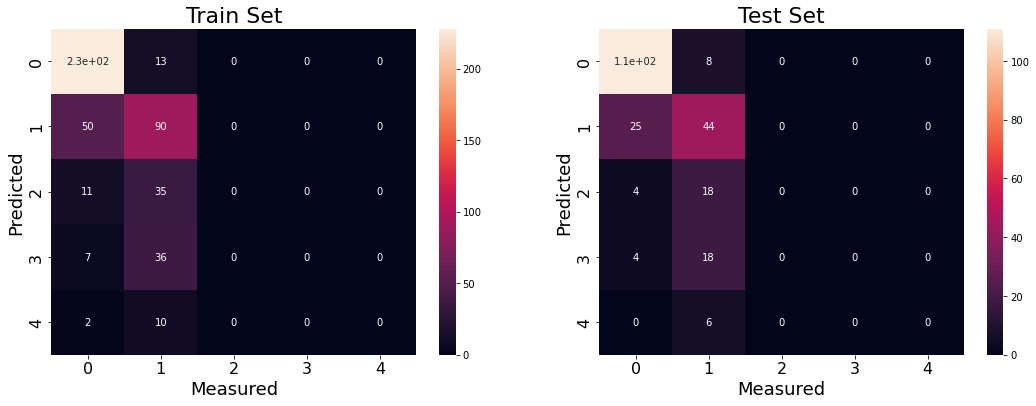

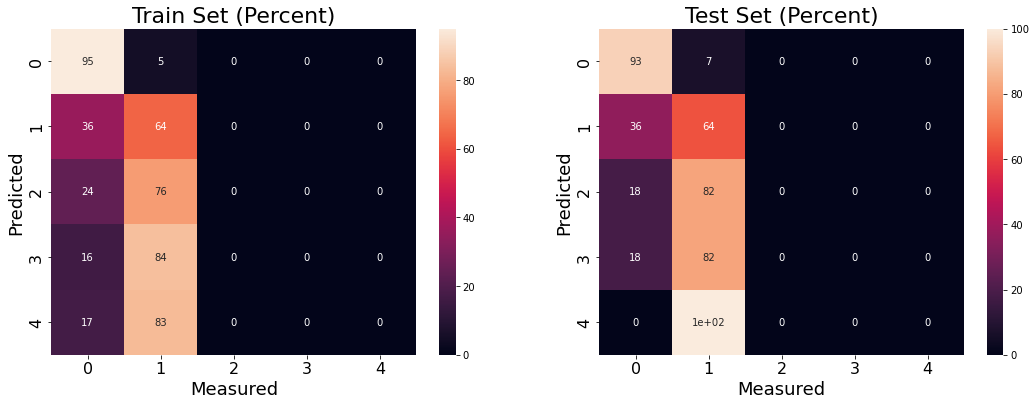

In [35]:
plot_confusion_matrix(rfc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

Precision score for training set is :0.77
Precision score for testing  set is :0.77
Recall score for training set is :0.95
Recall score for testing  set is :0.93
F1 score for training set is :0.85
F1 score for testing  set is :0.84
AUC for training set is :0.9
AUC for testing  set is :0.89


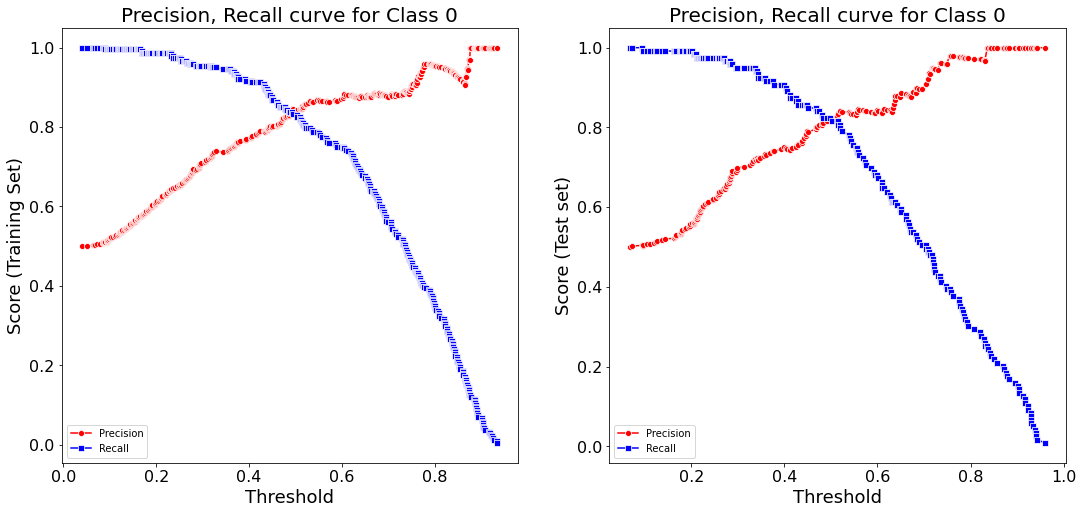

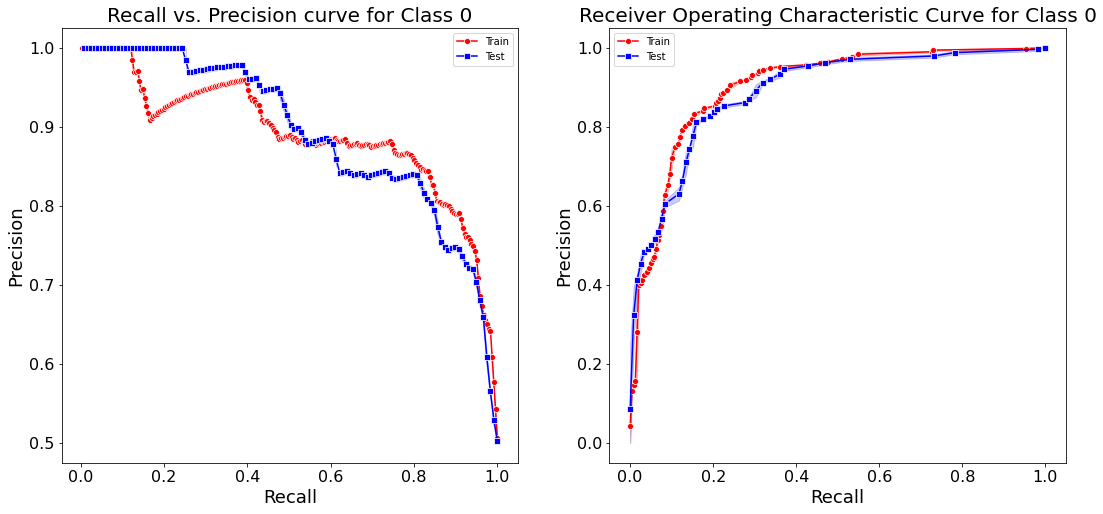

In [36]:
get_precision_recall(rfc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 0)

Precision score for training set is :0.0
Precision score for testing  set is :0.0
Recall score for training set is :0.0
Recall score for testing  set is :0.0
F1 score for training set is :0.0
F1 score for testing  set is :0.0
AUC for training set is :0.73
AUC for testing  set is :0.76


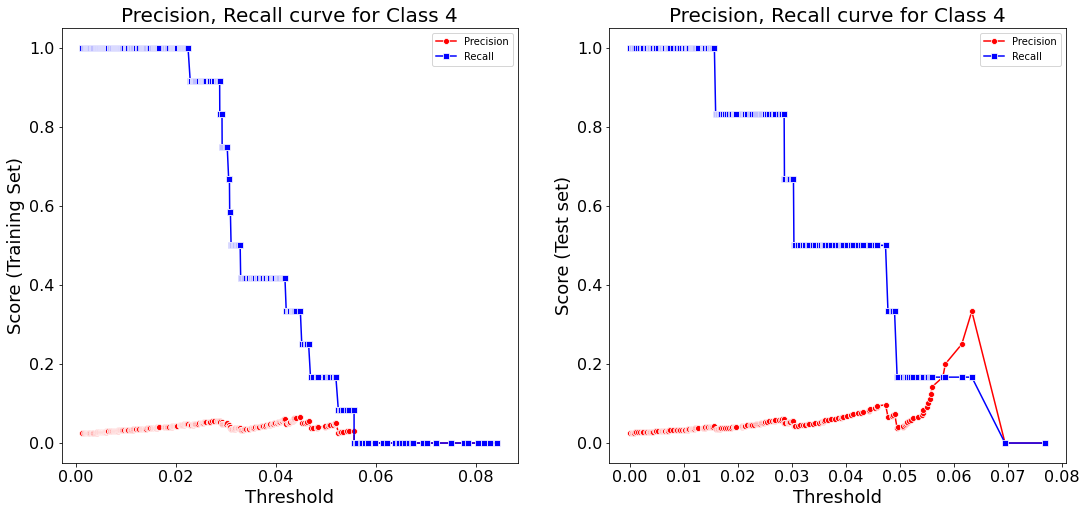

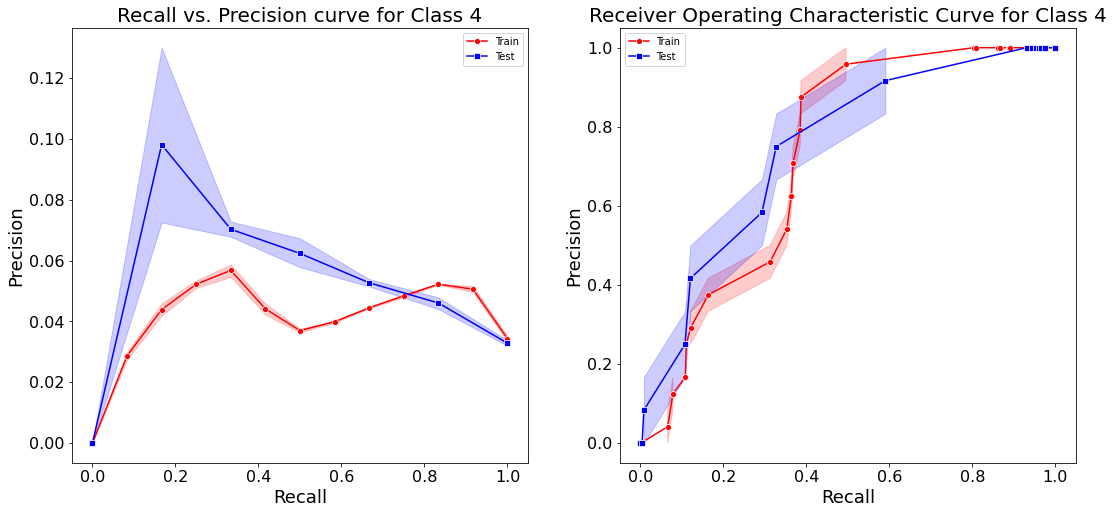

In [37]:
get_precision_recall(rfc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 4)